In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import make_circles

In [6]:
X,y = make_circles(n_samples=500,shuffle=True,noise=0.05,random_state=1,factor=0.8)

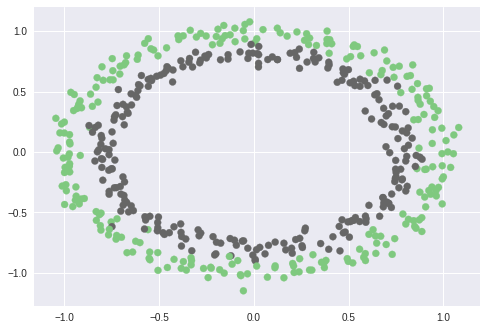

In [7]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Accent)

In [8]:
input_size = 3 #features
layers = [4,3] #no of neurons in 2nd and 3rd layer
out_size = 2

In [9]:
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l
def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

In [10]:
class NeuralNw():
    def __init__(self,input_size,layers,out_size):
        np.random.seed(0)
        model = {}
#         First layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
#         Second layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
#         Third layer
        model['W3'] = np.random.randn(layers[1],out_size)
        model['b3'] = np.zeros((1,out_size))
        self.model = model
    def feed_forward(self,x):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        self.activations = (a1,a2,y_)
        return y_
    def backprop(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        
        a1,a2,y_ = self.activations
        
        m = x.shape[0]
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)/float(m)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)/float(m)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1= np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)/float(m)
        
        self.model['W1'] -= learning_rate*dw1
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
    def predict(self,x):
        yout = self.feed_forward(x)
        return np.argmax(yout,axis=1)
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activations
        
        print("W1",W1.shape)
        print("A1",a1.shape)
        
        print("W2",W2.shape)
        print("A2",a2.shape)
        
        print("W3",W3.shape)
        print("A3",a3.shape)

In [11]:
model = NeuralNw(input_size=2,layers=[10,4],out_size=2)

In [12]:
# model.feed_forward(X)

In [13]:
def train(X,y,epochs,learning_rate,logs=True):
    training_loss = []
    classes=2
    yoht = one_hot(y,classes)
    for ix in range(epochs):
        y_ = model.feed_forward(X)
        l = loss(yoht,y_)
        training_loss.append(l)
        model.backprop(X,yoht,learning_rate)
        if(logs):
            print("epochs %d loss %.4f"%(ix,l))
    return training_loss
        

In [14]:
loss = train(X,y,500,0.001)

epochs 0 loss 0.7325
epochs 1 loss 0.5609
epochs 2 loss 0.4590
epochs 3 loss 0.4063
epochs 4 loss 0.3797
epochs 5 loss 0.3659
epochs 6 loss 0.3583
epochs 7 loss 0.3539
epochs 8 loss 0.3514
epochs 9 loss 0.3499
epochs 10 loss 0.3489
epochs 11 loss 0.3483
epochs 12 loss 0.3479
epochs 13 loss 0.3476
epochs 14 loss 0.3474
epochs 15 loss 0.3473
epochs 16 loss 0.3472
epochs 17 loss 0.3472
epochs 18 loss 0.3471
epochs 19 loss 0.3471
epochs 20 loss 0.3471
epochs 21 loss 0.3470
epochs 22 loss 0.3470
epochs 23 loss 0.3470
epochs 24 loss 0.3470
epochs 25 loss 0.3470
epochs 26 loss 0.3470
epochs 27 loss 0.3470
epochs 28 loss 0.3470
epochs 29 loss 0.3469
epochs 30 loss 0.3469
epochs 31 loss 0.3469
epochs 32 loss 0.3469
epochs 33 loss 0.3469
epochs 34 loss 0.3469
epochs 35 loss 0.3469
epochs 36 loss 0.3469
epochs 37 loss 0.3469
epochs 38 loss 0.3469
epochs 39 loss 0.3469
epochs 40 loss 0.3469
epochs 41 loss 0.3469
epochs 42 loss 0.3469
epochs 43 loss 0.3468
epochs 44 loss 0.3468
epochs 45 loss 0.346

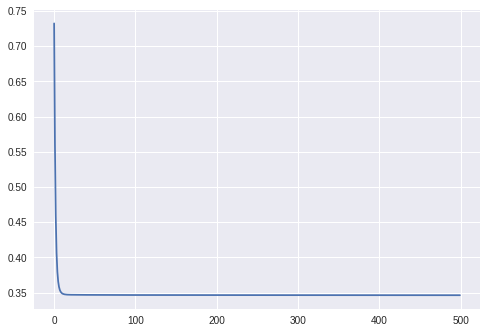

In [15]:
plt.plot(loss)

In [16]:
from visualize import plot_decision_boundary

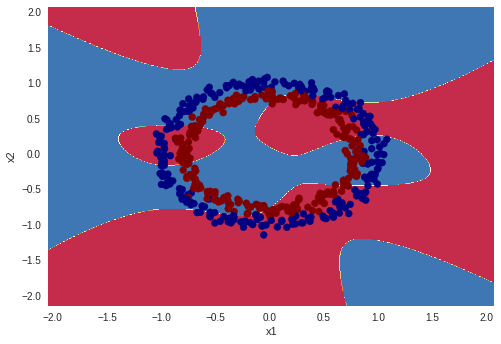

In [17]:
plot_decision_boundary(lambda x : model.predict(x),X,y)

In [18]:
outputs = model.predict(X)

In [22]:
np.sum(outputs==y)/float(y.shape[0])

0.516